# Deep Learning in Python

In [5]:
# Load Libraries
from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import optimizers

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os

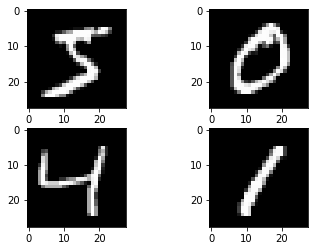

In [6]:
# Load (downloaded if needed) the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

## Building and testing Neural Network models

In [7]:
# Load CSV Data
data_augmentation = True
num_classes = 10

model_name = 'keras_cifar10_trained_model.h5'

df = pd.read_csv('data/mnist_train.csv')
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Define Target/Label 
x = df.drop(['label'], axis=1)
y = df['label']

In [9]:
# Train and Test Split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (29400, 784)
29400 train samples
12600 test samples


In [10]:
# Convert dataframes to Numpy array
x_train = np.array(x_train)

x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
# Convert class vectors to binary class matrices

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
batch_size = 10
num_classes = 10
epochs = 20

model = Sequential()
model.add(Dense(64,input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [14]:
# Train MLP Model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))


scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 29400 samples, validate on 12600 samples
Epoch 1/20
29400/29400 [==============================] - 9s 303us/step - loss: 9.1545 - acc: 0.4276 - val_loss: 7.4681 - val_acc: 0.5297
Epoch 2/20
29400/29400 [==============================] - 8s 268us/step - loss: 5.9647 - acc: 0.6227 - val_loss: 5.0635 - val_acc: 0.6811
Epoch 3/20
29400/29400 [==============================] - 8s 266us/step - loss: 5.0589 - acc: 0.6813 - val_loss: 4.5866 - val_acc: 0.7125
Epoch 4/20
29400/29400 [==============================] - 8s 263us/step - loss: 4.7830 - acc: 0.6994 - val_loss: 4.5036 - val_acc: 0.7179
Epoch 5/20
29400/29400 [==============================] - 8s 265us/step - loss: 4.7167 - acc: 0.7036 - val_loss: 4.4453 - val_acc: 0.7220
Epoch 6/20
29400/29400 [==============================] - 8s 268us/step - loss: 4.5965 - acc: 0.7113 - val_loss: 3.2521 - val_acc: 0.7937
Epoch 7/20
29400/29400 [====